## Dimensionality reduction using PCA & LDA

In [105]:
# Import libraries
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import time
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [8]:
mnist = fetch_mldata('MNIST original')

View the shape of the data and labels

In [11]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


Split the whole data into train and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Standardize the data to Zero mean and Unit variance. PCA is affected otherwise.

In [89]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create instance of PCA, and pass the parameter of n_components as 0.85, which means it will choose the minimum number of components such that 85% of variance is retained.

In [90]:
pca = PCA(.85)

In [91]:
# Fit PCA on training set only
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

See how many principal components did it choose to retain 85% variance

In [92]:
pca.n_components_

185

In [97]:
# Apply transform to both the training set and the test set.
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [99]:
X_train_pca.shape

(60000, 185)

In [100]:
approximation = pca.inverse_transform(X_train_pca)
approximation.shape

(60000, 784)

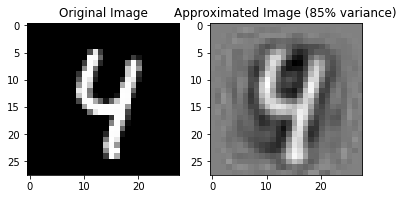

In [95]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[1].reshape(28,28), cmap = plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(approximation[1].reshape(28,28), cmap = plt.cm.gray)
plt.title('Approximated Image (85% variance)')
plt.show()

Now let's make a classifier. We will use Logistic Regression, with ‘lbfgs’ solver and one-vs-rest (ovr) for multi_class classification (default).

In [112]:
# Using the data without PCA (28*28 = 784 components)
clf = LogisticRegression(solver = 'lbfgs')
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print('Training time:', end - start, 'seconds')
print('Accuracy:', clf.score(X_test, y_test))

Training time: 72.11955523490906 seconds
Accuracy: 0.9142


In [114]:
# Using the data with PCA (185 components)
clf_pca = LogisticRegression(solver = 'lbfgs')
start = time.time()
clf_pca.fit(X_train_pca, y_train)
end = time.time()
print('Training time:', end - start, 'seconds')
print('Accuracy:', clf_pca.score(X_test_pca, y_test))

Training time: 20.88292956352234 seconds
Accuracy: 0.9167


Now, let's try Linear Discriminant Analysis (LDA)

In [118]:
lda = LinearDiscriminantAnalysis() # n_components = #classes - 1 = 10 - 1 = 9 (default)
lda.fit(X_train_scaled, y_train)
# Apply transform to both the training set and the test set.
X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)
X_train_lda.shape

(60000, 9)

In [119]:
# Using the data with LDA (#classes - 1 = 9 components)
clf_lda = LogisticRegression(solver = 'lbfgs')
start = time.time()
clf_lda.fit(X_train_lda, y_train)
end = time.time()
print('Training time:', end - start, 'seconds')
print('Accuracy:', clf_lda.score(X_test_lda, y_test))

Training time: 0.6292822360992432 seconds
Accuracy: 0.8732


#### Hence, we see how PCA & LDA can be used for dimentionality reduction in order to speed up the Machine Learning algorithm